In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [16]:
import gc
import datetime
pd.set_option('display.max_columns', 500)

In [4]:
%matplotlib inline
color = sns.color_palette()

In [5]:
Data_E = pd.read_csv('D:\DS\Python\Project\Python Assignment 5_BI/Ecommerce_UK_Retailer.csv',encoding='latin1')
Data_E.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 1. Perform Basic EDA

In [13]:
Data_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 1. Perform Basic EDA

In [ ]:
# a. Boxplot – All Numeric Variables

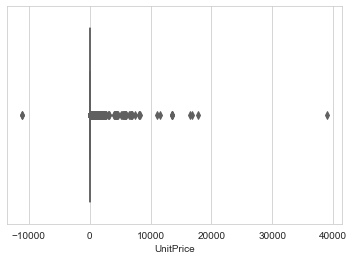

In [19]:
sns.boxplot(x='UnitPrice',data=Data_E)
plt.show()

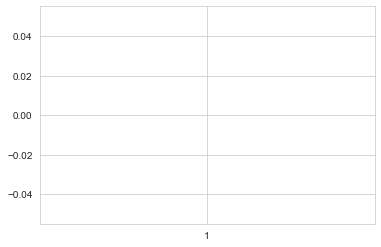

In [8]:
plt.boxplot(Data_E['CustomerID'])
plt.show()

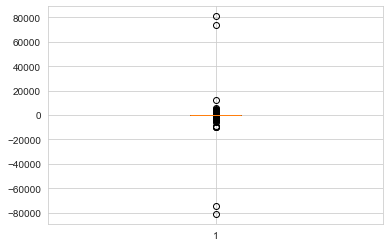

In [10]:
plt.boxplot(Data_E['Quantity'])
plt.show()

In [ ]:
# b. Histogram – All Numeric Variables

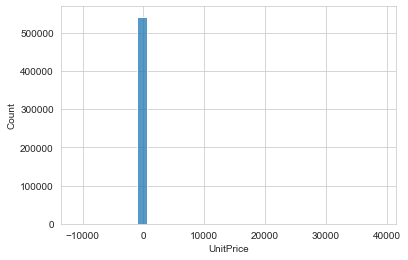

In [35]:
sns.histplot(Data_E['UnitPrice'],bins=30)
plt.show()

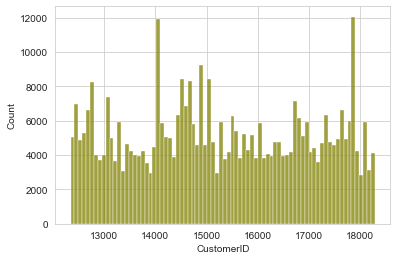

In [33]:
sns.histplot(Data_E['CustomerID'],color="olive")
plt.show()

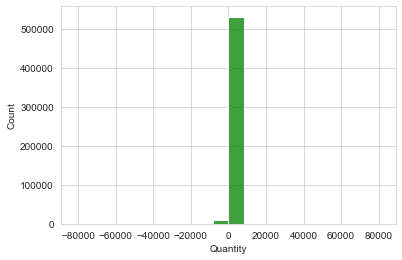

In [32]:
sns.histplot(Data_E['Quantity'],bins=20,color="green")
plt.show()

In [ ]:
# c. Distribution Plot – All Numeric Variables

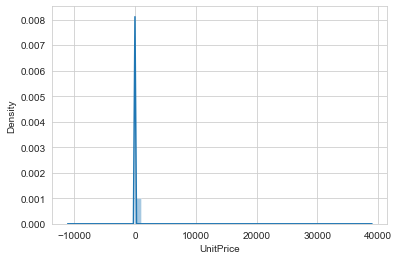

In [36]:
sns.distplot(Data_E['UnitPrice'])
plt.show()

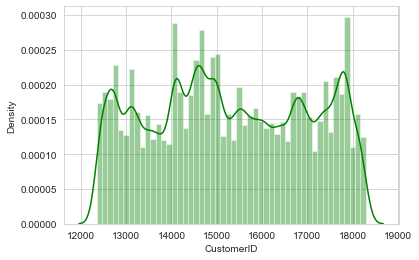

In [37]:
sns.distplot(Data_E['CustomerID'],color="green")
plt.show()

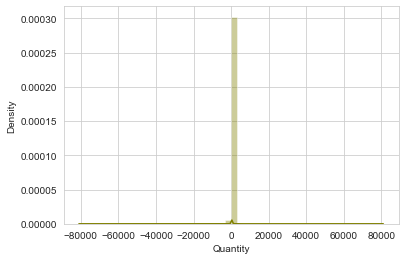

In [38]:
sns.distplot(Data_E['Quantity'],color="olive")
plt.show()

In [ ]:
# d.Aggregation for all numerical Columns

In [12]:
x=Data_E[["UnitPrice","Quantity","CustomerID"]]

In [13]:
x.head()

,UnitPrice,Quantity,CustomerID
0,2.55,6,17850.0
1,3.39,6,17850.0
2,2.75,8,17850.0
3,3.39,6,17850.0
4,3.39,6,17850.0


In [14]:
x.sum()

UnitPrice     2.498804e+06
Quantity      5.176450e+06
CustomerID    6.219476e+09
dtype: float64

In [15]:
x.mean()

UnitPrice         4.611114
Quantity          9.552250
CustomerID    15287.690570
dtype: float64

In [16]:
x.median()

UnitPrice         2.08
Quantity          3.00
CustomerID    15152.00
dtype: float64

In [17]:
x.std()

UnitPrice       96.759853
Quantity       218.081158
CustomerID    1713.600303
dtype: float64

In [18]:
x.max()

UnitPrice     38970.0
Quantity      80995.0
CustomerID    18287.0
dtype: float64

In [19]:
x.min()

UnitPrice    -11062.06
Quantity     -80995.00
CustomerID    12346.00
dtype: float64

In [39]:
Data_E.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# e. Unique Values across all columns

In [20]:
for col in Data_E:
    print(Data_E[col].unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -2

In [21]:
Data_E.count(axis=0)

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [22]:
Data_E.nunique(axis=0)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
# f. Duplicate values across all columns

In [23]:
Data_E[Data_E.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [24]:
Data_E.shape

(541909, 8)

In [25]:
Data_E=Data_E.drop_duplicates(keep=False)

In [27]:
Data_E.shape

(531762, 8)

In [28]:
Data_E[Data_E.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# g. Correlation – Heatmap - All Numeric Variables

In [16]:
Data_E.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


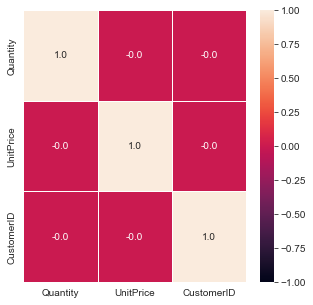

In [20]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(Data_E.corr(), vmin=-1, vmax=1, annot=True,linewidths=.5, fmt='.1f',ax=ax);
plt.show()

In [ ]:
# h. Regression Plot - All Numeric Variables

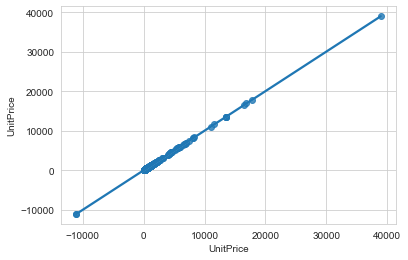

In [23]:
sns.regplot(x='UnitPrice',y='UnitPrice',data=Data_E)
plt.show()

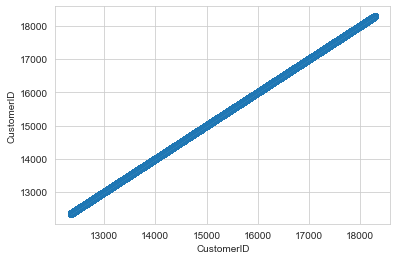

In [6]:
sns.regplot(x='CustomerID',y='CustomerID',data=Data_E)
plt.show()

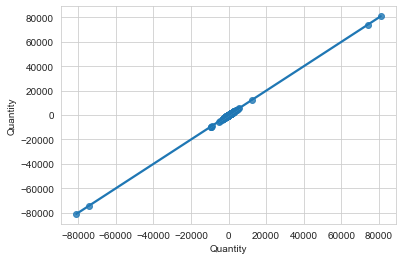

In [7]:
sns.regplot(x='Quantity',y='Quantity',data=Data_E)
plt.show()

In [ ]:
# i. Bar Plot – Every Categorical Variable vs every Numerical Variable

In [30]:
Data_E.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


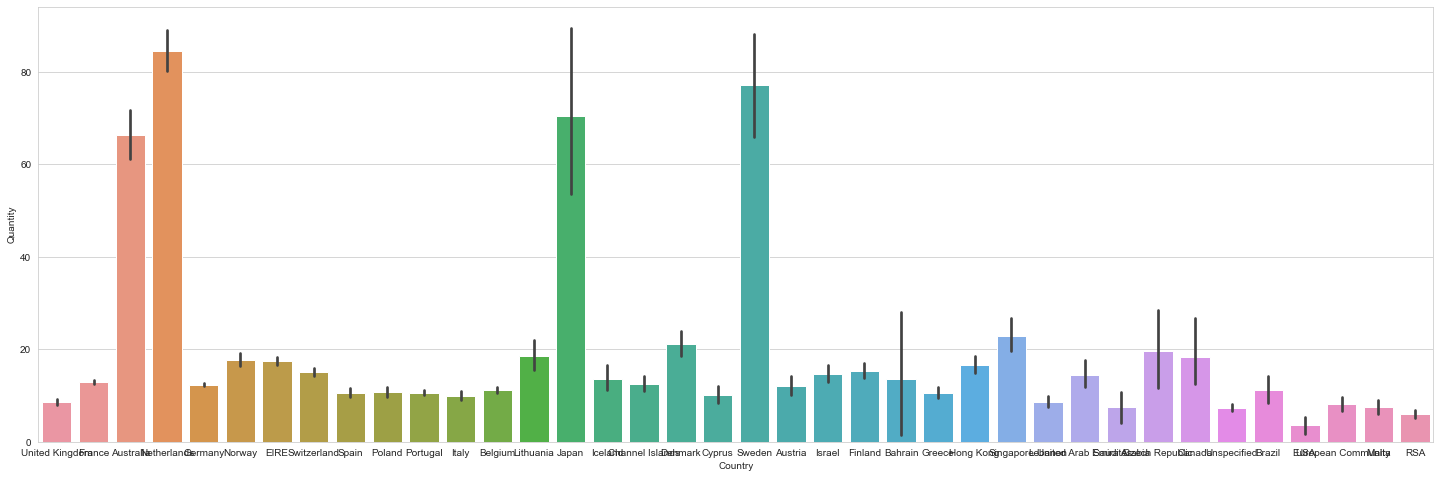

In [12]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country",y="Quantity",ax=ax,data=Data_E)
plt.show()

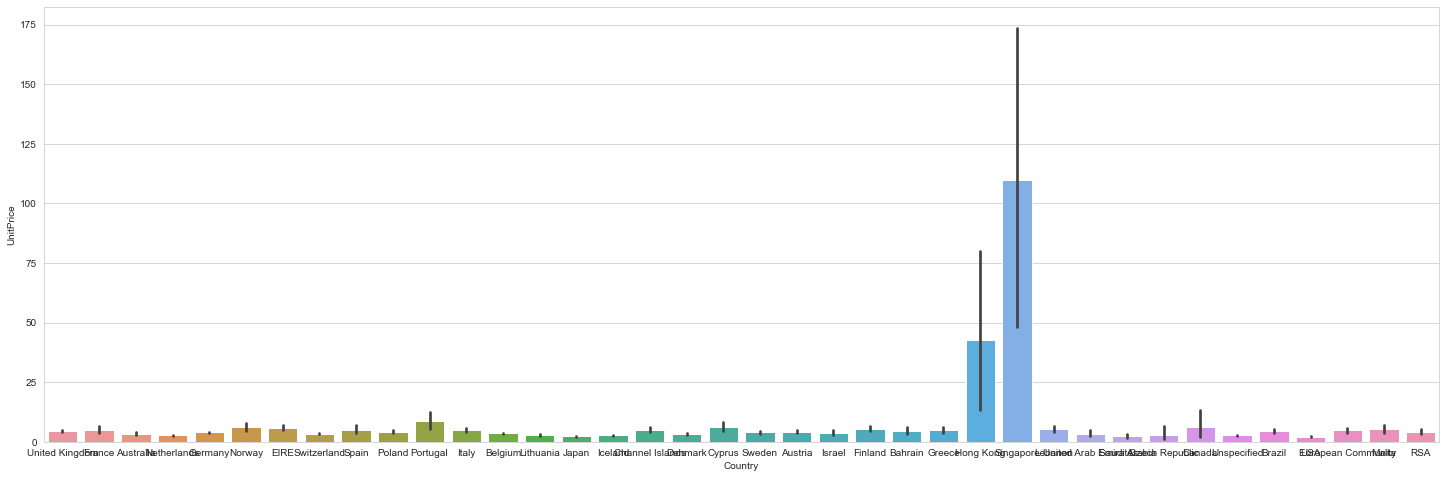

In [14]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country",y="UnitPrice",ax=ax,data=Data_E)
plt.show()

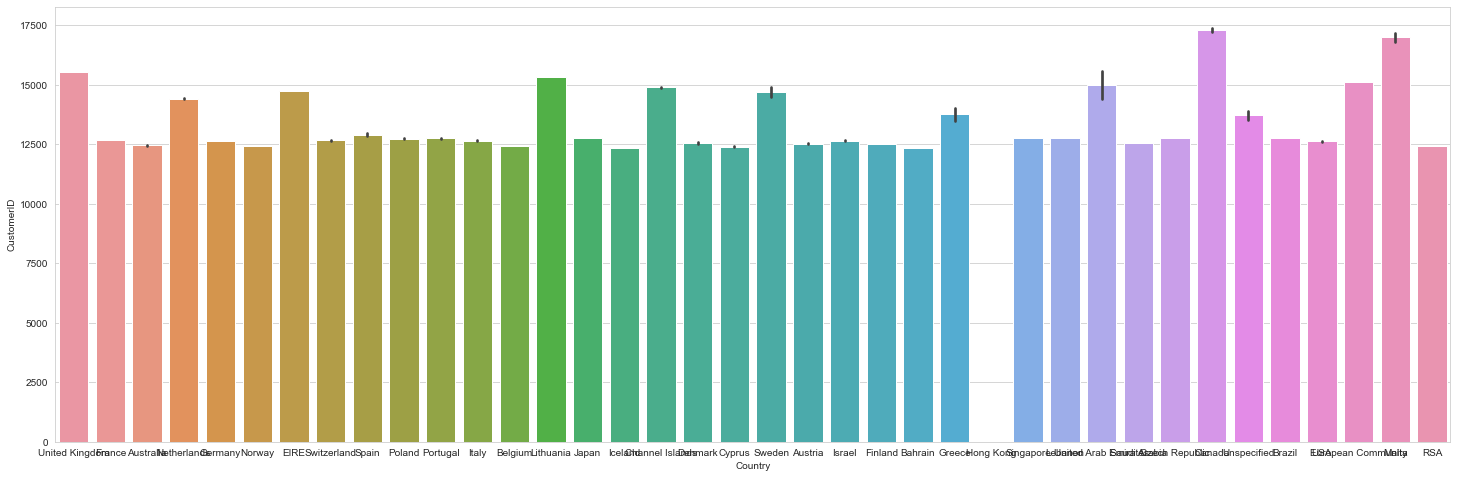

In [15]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country",y="CustomerID",ax=ax,data=Data_E)
plt.show()

In [ ]:
# j. Pair plot - All Numeric Variables

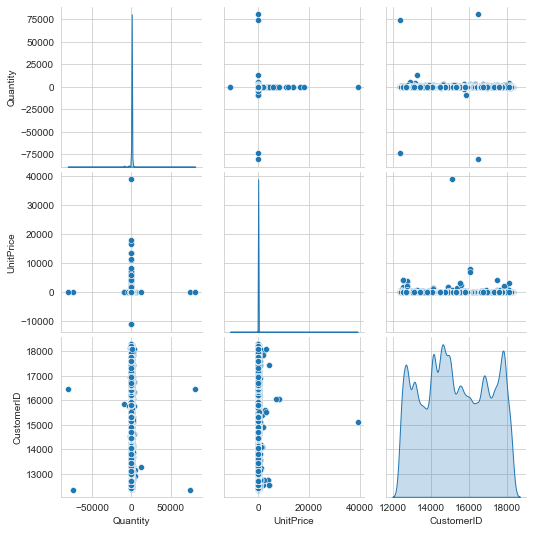

In [51]:
sns.pairplot(Data_E,diag_kind="kde",kind="scatter",palette="husl")
plt.show()

In [ ]:
# k. Line chart to show the trend of data - All Numeric/Date Variables

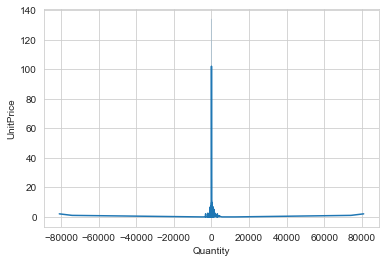

In [11]:
sns.lineplot(x='Quantity',y='UnitPrice',data=Data_E)
plt.show()

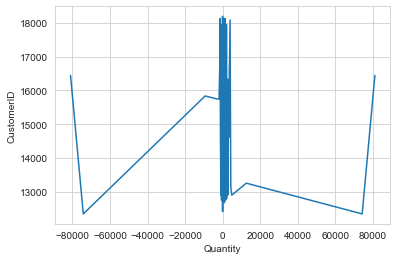

In [17]:
sns.lineplot(x='Quantity',y='CustomerID',data=Data_E)
plt.show()

In [ ]:
# l. Plot the skewness - All Numeric Variables

In [60]:
x=Data_E.skew(axis = 0, skipna = True)
x.head()

Quantity       -0.263791
UnitPrice     184.756896
CustomerID      0.038277
dtype: float64

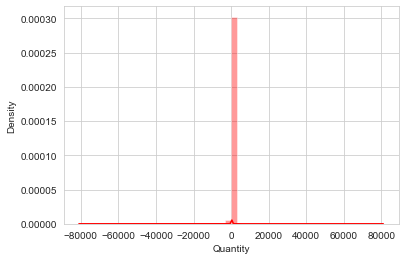

In [7]:
sns.distplot(Data_E['Quantity'],color='r')
ske=Data_E['Quantity'].skew()

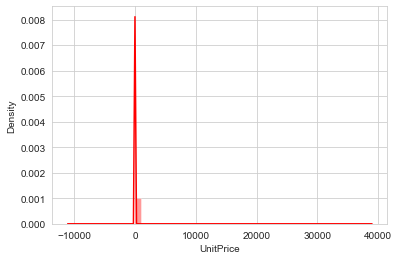

In [9]:
sns.distplot(Data_E['UnitPrice'],color='r')
ske=Data_E['UnitPrice'].skew()

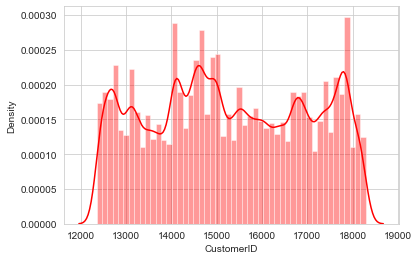

In [10]:
sns.distplot(Data_E['CustomerID'],color='r')
ske=Data_E['CustomerID'].skew()

In [ ]:
# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [62]:
Data_E.isnull().sum().sort_values(ascending=False)

CustomerID     134995
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

<AxesSubplot:xlabel='CustomerID'>

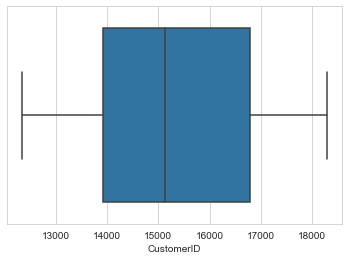

In [63]:
sns.boxplot(Data_E["CustomerID"])

<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

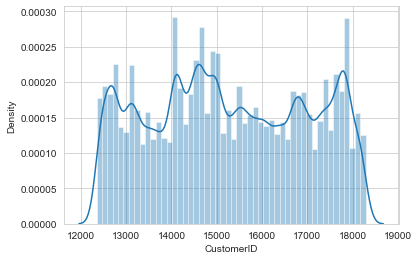

In [64]:
sns.distplot(Data_E["CustomerID"])

In [ ]:
# As the data distribution is symmetric the appropriate metric is mean .So, we have to replace missing values with mean

In [65]:
x=Data_E["CustomerID"].mean()
type(x)

float

In [66]:
int(x)

15275

In [67]:
Data_E['CustomerID']=Data_E["CustomerID"].fillna(x)

In [68]:
Data_E.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [69]:
Data_E.dropna(inplace=True)

In [70]:
Data_E.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# 3. Remove duplicate rows

In [71]:
Data_E[Data_E.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# 4. Remove rows which have negative values in Quantity column

In [72]:
(Data_E["Quantity"]<0).sum()

9693

In [73]:
Data_E.drop(Data_E[Data_E["Quantity"]<0].index,inplace=True)

In [74]:
Data_E.shape

(520615, 8)

In [ ]:
# 4. Add the columns - Month, Day and Hour for the invoice

In [76]:
Data_E.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [78]:
import datetime as dt

In [79]:
Data_E['InvoiceDate'] = pd.to_datetime(Data_E.InvoiceDate, format='%m/%d/%Y %H:%M')

In [ ]:
Data_E.insert(loc=2, column='year_month', value=Data_E['InvoiceDate'].map(lambda x: 100*x.year + x.month))
Data_E.insert(loc=3, column='month', value=Data_E.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
Data_E.insert(loc=4, column='day', value=(Data_E.InvoiceDate.dt.dayofweek)+1)
Data_E.insert(loc=5, column='hour', value=Data_E.InvoiceDate.dt.hour)

In [105]:
Data_E.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# 6. How many orders made by the customers?

In [85]:
Data_E.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


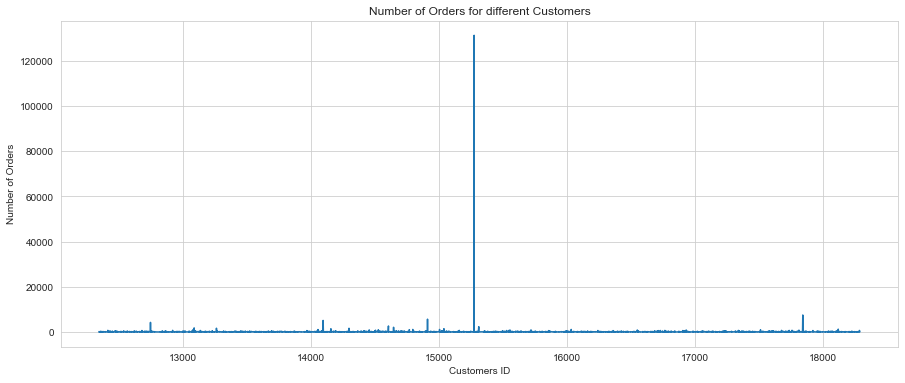

In [86]:
orders = Data_E.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [ ]:
# 7. Check TOP 5 most number of orders

In [87]:
orders['CustomerID'] = orders['CustomerID'].astype('int64')

In [88]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
2169,15275,United Kingdom,131300
4028,17841,United Kingdom,7523
1888,14911,EIRE,5667
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4243


In [ ]:
# 8. How much money spent by the customers?

In [89]:
Data_E['Amount_Spent'] = Data_E['Quantity'] * Data_E['UnitPrice']

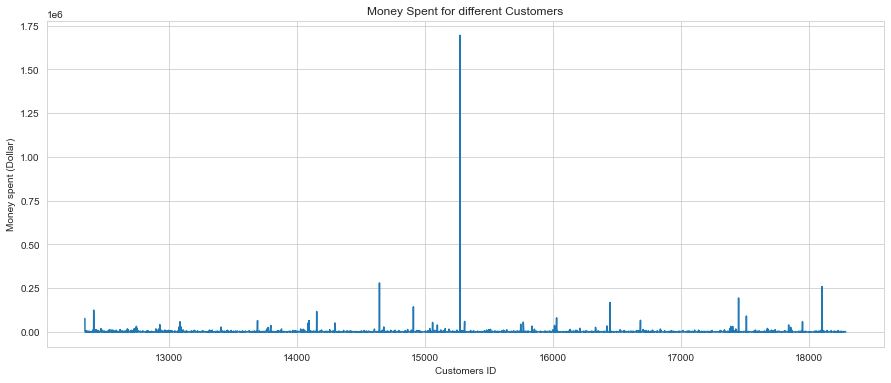

In [90]:
money_spent = Data_E.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [ ]:
# 9. TOP 5 customers with highest money spent

In [91]:
money_spent.sort_values(by='Amount_Spent', ascending=False).head()

,CustomerID,Country,Amount_Spent
2169,15275.108517,United Kingdom,1694485.90
1698,14646.000000,Netherlands,280206.02
4219,18102.000000,United Kingdom,259657.30
3746,17450.000000,United Kingdom,194230.79
3026,16446.000000,United Kingdom,168472.50


In [ ]:
# 10. How many orders per month?

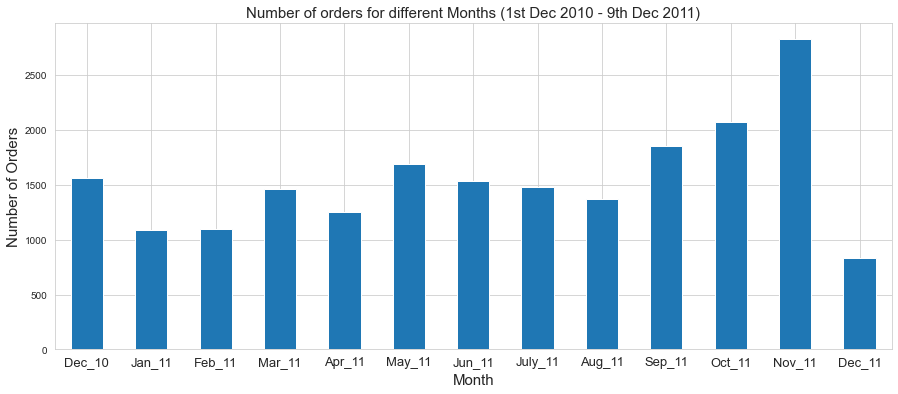

In [96]:
ax = Data_E.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [ ]:
# 11. How many orders per day?

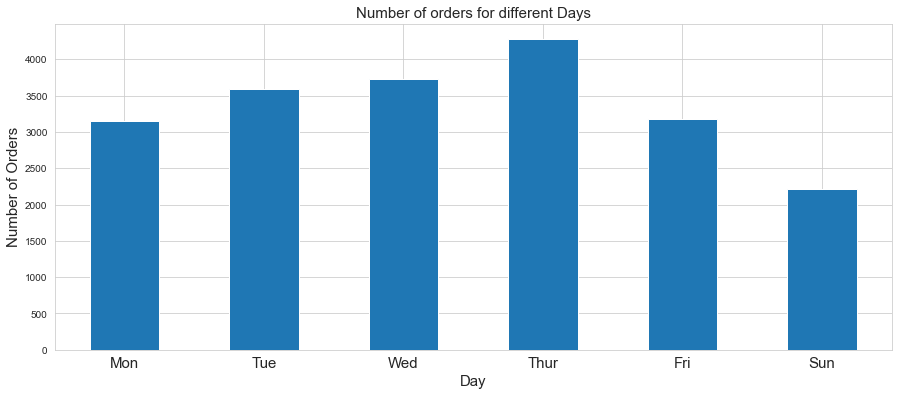

In [109]:
ax = Data_E.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [ ]:
# 12. How many orders per hour?

In [111]:
a=Data_E['hour'].value_counts().sort_index()

In [114]:
ax= Data_E.groupby('InvoiceNo')['hour'].unique().value_counts()

#value_counts().sort_index()

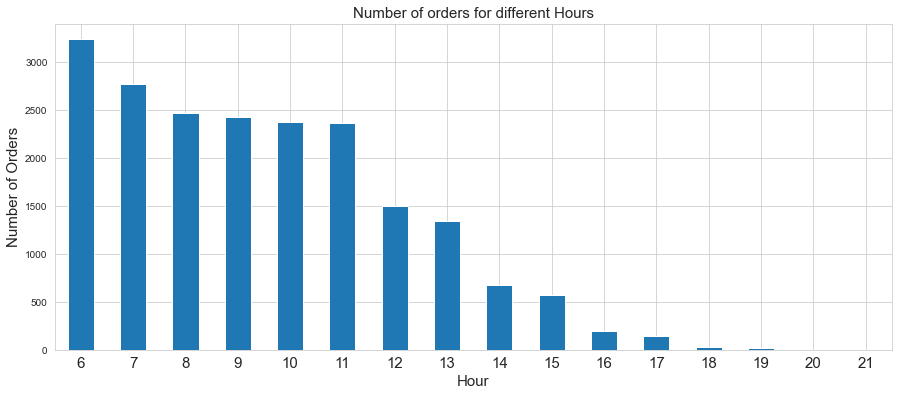

In [110]:
ax= Data_E.groupby('InvoiceNo')["hour"].unique().value_counts().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,22), rotation='horizontal', fontsize=15)
plt.show()

In [ ]:
# 13. How many orders for each country?

In [116]:
group_country_orders = Data_E.groupby('Country')['InvoiceNo'].count().sort_values()
group_country_orders

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  276
Israel                     289
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                438
Sweden                     449
Cyprus                     593
Finland                    685
Channel Islands            746
Italy                      758
Norway                    1072
Australia                 1183
Portugal                  1484
Switzerland               1951
Belgium                   2031


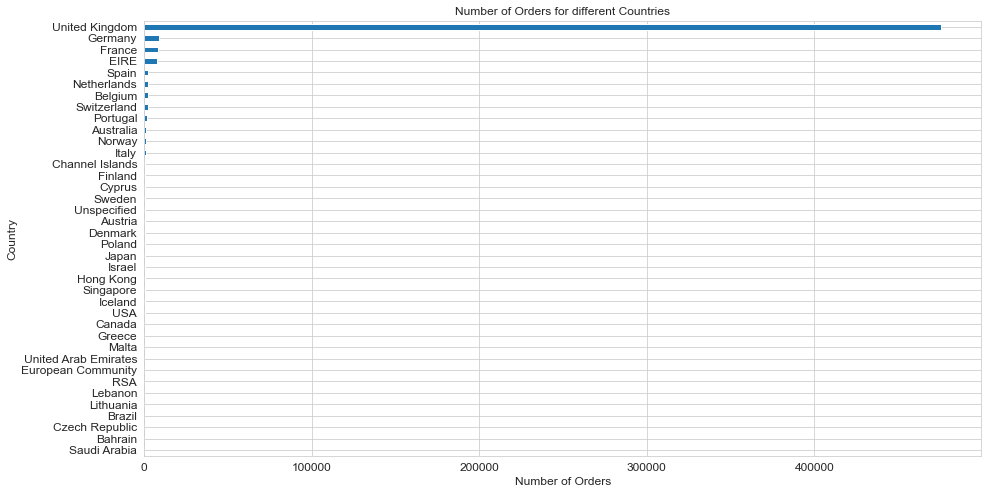

In [117]:
group_country_orders = Data_E.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

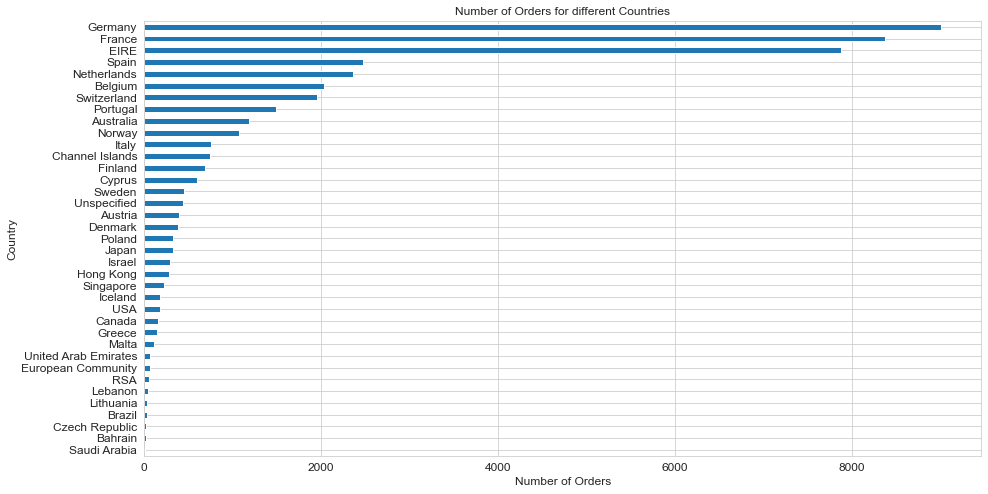

In [118]:
group_country_orders = Data_E.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']
# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [ ]:
# 14. Orders trend across months

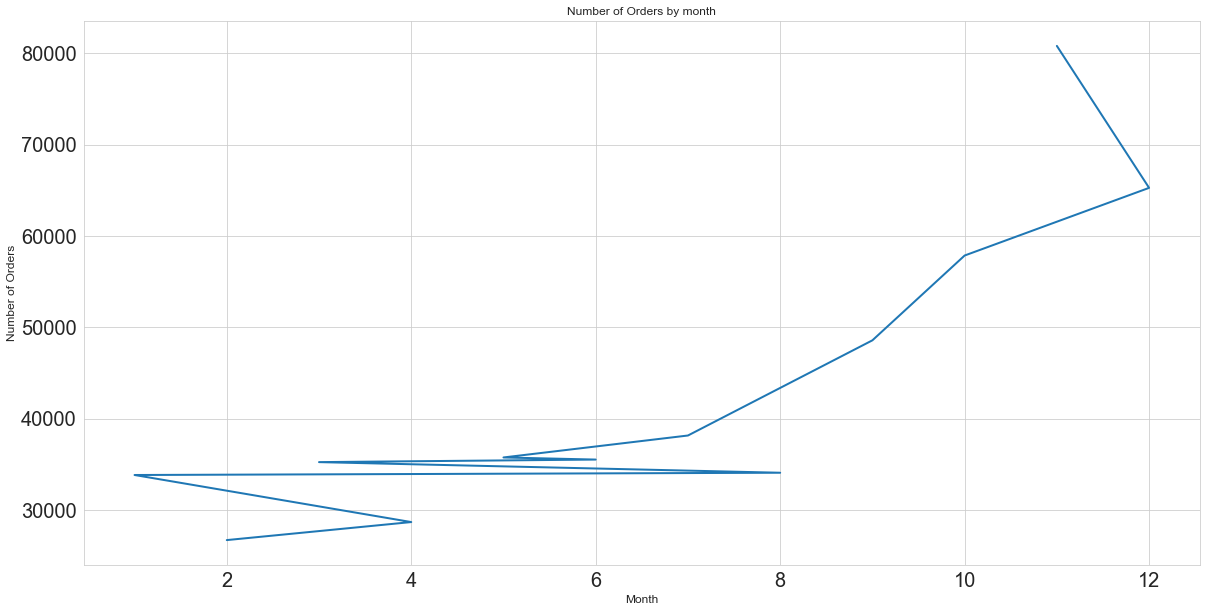

In [135]:
group_country_orders = Data_E.groupby('month')['InvoiceNo'].count().sort_values()
plt.subplots(figsize=(15,8))
group_country_orders.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders by month', fontsize=12)
plt.show()

In [ ]:
# 15. How much money spent by each country?

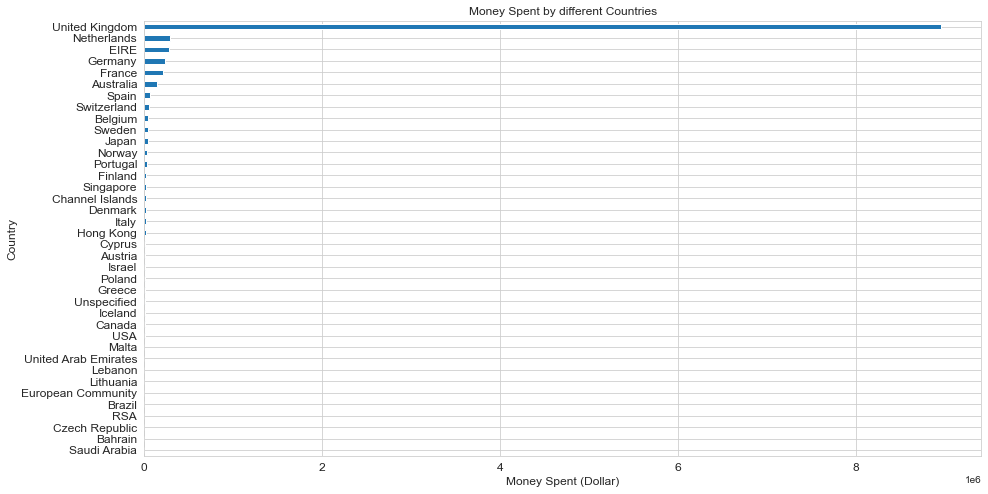

In [122]:
group_country_amount_spent = Data_E.groupby('Country')['Amount_Spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()